In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [128]:
df = pd.read_csv("ICRISAT-District Level Data.csv")
df=df.drop('Dist Code', axis = 1 )
df=df.drop('State Code', axis = 1 )
df=df.drop('Dist Name', axis = 1 )
df=df.drop('State Name', axis = 1 )
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['year'] = df['Year'].dt.year
df=df.drop('Year',axis = 1)
# df['month'] = df['Year'].dt.month
# df['day'] = df['Year'].dt.day
# df['hour'] = df['Year'].dt.hour
df.tail()

,WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),year
47,166.8,376.83,2013
48,118.0,362.00,2014
49,171.0,552.00,2015
50,186.0,636.00,2016
51,125.8,471.60,2017


In [39]:
train , valid , test =np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [40]:
def scale_dataset(dataframe):
  target = dataframe[dataframe.columns[1]].values
  features = dataframe.drop(dataframe.columns[1], axis=1).values

  return features,target

In [41]:
X_train, Y_train = scale_dataset(train)
X_valid, Y_valid = scale_dataset(valid)
X_test, Y_test = scale_dataset(test)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# assuming X_train, y_train are obtained using scale_dataset function
linreg_model = LinearRegression()

# fit the model to the training data
linreg_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = linreg_model.predict(X_test)

# evaluate the performance of the model
score = linreg_model.score(X_test, Y_test)
print ("X Test :" , X_test)

X Test : [[  37.1  2002.  ]
 [  31.   1966.  ]
 [ 126.24 2012.  ]
 [  78.5  1994.  ]
 [  56.   1972.  ]
 [  70.1  1975.  ]
 [  48.7  1979.  ]
 [  47.6  1980.  ]
 [  68.1  1990.  ]
 [ 171.   2015.  ]
 [  48.7  1982.  ]]


In [43]:
print ("Predictions :" , y_pred)

Predictions : [ 88.4171495  -40.42900636 366.26939113 178.13808415  47.43460543
  95.7954372   48.99727106  49.06232951 136.90936098 499.50143128
  58.32731228]


In [44]:

print("Real Results : ", Y_test)

Real Results :  [ 56.1   19.   260.68 196.8   49.8   91.4   58.2   55.6  157.   552.
  78.2 ]


In [45]:
print("Score:", score)

Score: 0.9167220444212094


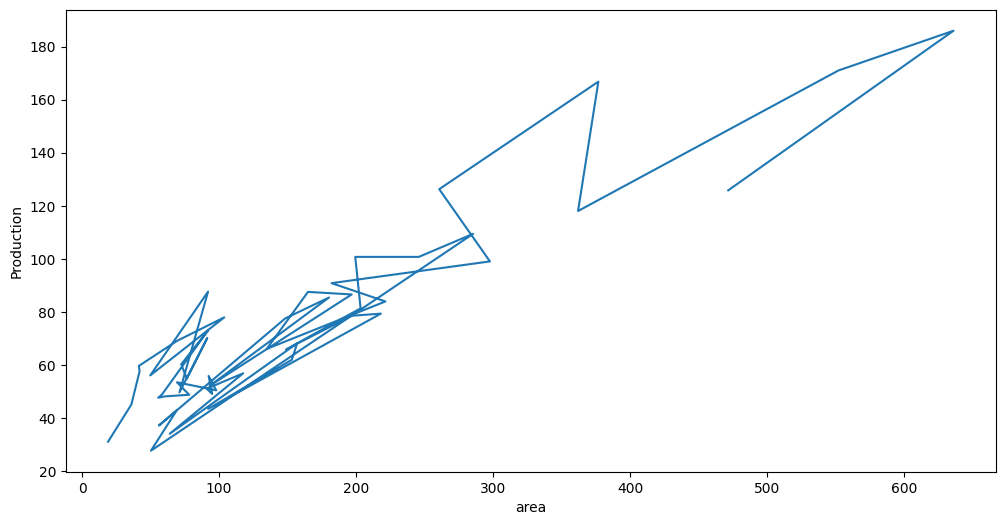

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(df['WHEAT PRODUCTION (1000 tons)'], df['WHEAT AREA (1000 ha)'])
plt.xlabel('area')
plt.ylabel('Production')
plt.show()

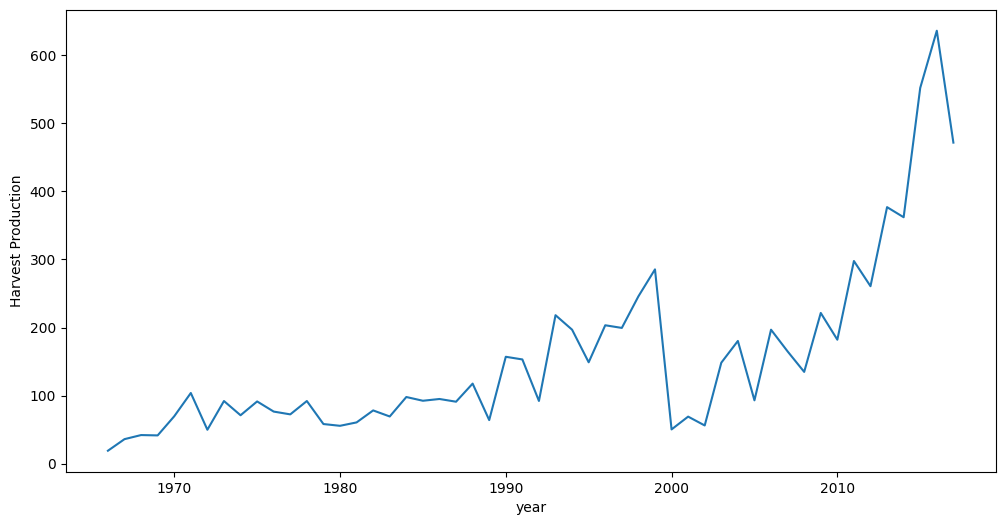

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['WHEAT PRODUCTION (1000 tons)'])
plt.xlabel('year')
plt.ylabel('Harvest Production')
plt.show()

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train,Y_train)

# Step 4: Make predictions on the testing set and evaluate model performance using mean squared error
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
#saving the model so as to deploy it later
import joblib

joblib.dump(rf_model, 'rf_model.joblib')

print('Mean Squared Error:', mse)
print('Accuracy',rf_model.score(X_test,Y_test))
Y_test

Mean Squared Error: 2396.0393998340746
Accuracy 0.8890372165741323


array([ 56.1 ,  19.  , 260.68, 196.8 ,  49.8 ,  91.4 ,  58.2 ,  55.6 ,
       157.  , 552.  ,  78.2 ])

In [109]:
y_pred

array([ 82.46,  41.83, 362.87, 196.15,  65.67,  80.99,  71.56,  67.32,
       117.29, 440.64,  71.53])

In [ ]:
pip install streamlit


In [140]:
%%writefile app.py
import streamlit as st
import joblib

# Load the RandomForestRegressor model
rf_model = joblib.load('rf_model.joblib')

# Define the Streamlit app
st.title('Random Forest Regressor App')

# Add input elements for user interaction
input_value1 = st.slider('Enter the WHEAT AREA (1000 ha) ', min_value=0, max_value=700, value=100)
input_value2 = st.slider('Year ', min_value=1966, max_value=2017, value=1966)
# Add more sliders for additional features if needed

# Create a button for predictions
if st.button('Predict'):
    # Make predictions using the model
    prediction = rf_model.predict([[input_value1, input_value2]])[0]

    # Display the prediction
    st.write(f'Predicted WHEAT PRODUCTION (1000 tons) : {prediction}')


Overwriting app.py


In [141]:
!pip install pyngrok

In [145]:


!ngrok authtoken #yourauthtoken

NAME:
  authtoken - 

USAGE:
  ngrok authtoken TOKEN [flags]

DESCRIPTION: 

OPTIONS:
      --config string       save in this config file (default /root/.config/ngrok/ngrok.yml)
  -h, --help                help for authtoken
      --log string          path to log file, 'stdout', 'stderr' or 'false' (default "false")
      --log-format string   log record format: 'term', 'logfmt', 'json' (default "term")
      --log-level string    logging level: 'debug', 'info', 'warn', 'error', 'crit' (default "info")

ERROR:  accepts 1 arg(s), received 0


In [143]:
from pyngrok import ngrok
url = ngrok.connect(addr="172.28.0.12:8501")
url


<NgrokTunnel: "https://a7bb-35-233-244-49.ngrok-free.app" -> "http://172.28.0.12:8501">

In [144]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.244.49:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/cli.py", line 233, in main_run
   

# Experimental (Second Stage)

#Lets go one step further towards neural network and implement this same stuff using neural network

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
normalizer = tf.keras.layers.Normalization(input_shape = (2,),axis =1)
normalizer.adapt(X_train)

In [97]:
model=tf.keras.Sequential(
    [
        normalizer,
     tf.keras.layers.Dense(1)
    ]
)
np.set_printoptions(suppress=True, precision=2)

# Assuming 'predictions' contains the predicted values
predictions = model.predict(X_train[:10])

print(predictions)

1/1 [==============================] - 0s 53ms/step
[[ 0.57]
 [-0.47]
 [-0.18]
 [-0.2 ]
 [-0.76]
 [-0.53]
 [ 0.18]
 [ 0.88]
 [-0.59]
 [-0.32]]


In [98]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),loss ="mean_squared_error")

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 2)                 5         
 on)                                                             
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 8 (36.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [100]:
history = model.fit(
    X_train, Y_train,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid, Y_valid)
)

In [101]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,40333.355469,15280.681641,995
996,40326.429688,15278.287109,996
997,40319.511719,15275.893555,997
998,40312.593750,15273.500000,998
999,40305.675781,15271.106445,999


In [102]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

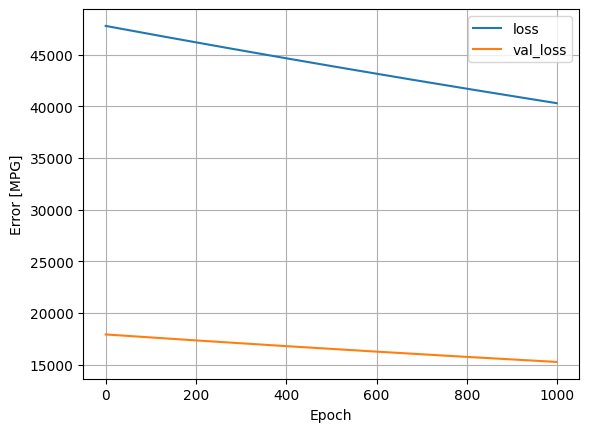

In [103]:
plot_loss(history)
plt.show()